In [9]:
import torch
from glob import glob

mca_preds = []
for filepath in glob('mca_preds/predictions_*.pt'):
    mca_preds.append(torch.load(filepath))
mca_preds = torch.stack(mca_preds).detach()

In [10]:
means = mca_preds.mean(dim=0)
std = mca_preds.std(dim=0)

In [11]:
significant_sigits = -torch.log10(std / means.abs())

In [12]:
significant_sigits.mean().item()

6.180703639984131

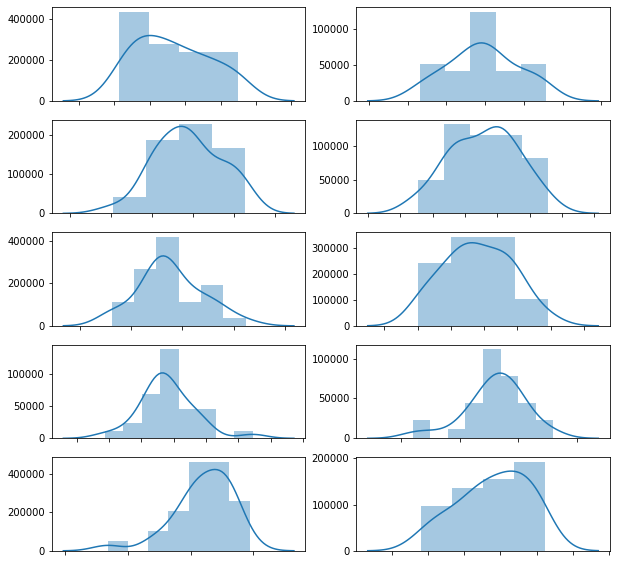

In [30]:
import seaborn as sns
from matplotlib import pyplot as plt

sample_idx = 0
fig, axs = plt.subplots(ncols=2, nrows=5)
fig.set_size_inches(10, 10)
axs = axs.flatten()
for i in range(10):
    p = sns.distplot(mca_preds[:, sample_idx, i], ax=axs[i])
    p.set(xticklabels=[])